#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
url= 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [ ]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
pd.json_normalize(df['account'])

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [ ]:
df_final = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_final['churn'].unique()

array(['no', 'yes', ''], dtype=object)

In [ ]:
df_final['churn'] = df_final['churn'].str.strip().str.lower()

In [ ]:
df_final['churn'].replace('', np.nan, inplace=True)

/tmp/ipython-input-3210554654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['churn'].replace('', np.nan, inplace=True)


In [ ]:
print(df_final['churn'].value_counts(dropna=False))

churn
no     5174
yes    1869
Name: count, dtype: int64


In [ ]:
df_final = df_final.dropna(subset=['churn'])

#🔧 Transformación

In [ ]:
df.customerID.duplicated().sum()

np.int64(0)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
na_counts = (df_final.isna().sum()
                       .to_frame('nulos')
                       .assign(pct=lambda x: round(100*x['nulos']/len(df_final),2))
                       .sort_values('nulos', ascending=False))
display(na_counts.head(15))

,nulos,pct
charges_total,11,0.16
customerid,0,0.00
gender,0,0.00
seniorcitizen,0,0.00
partner,0,0.00
churn,0,0.00
dependents,0,0.00
tenure,0,0.00
multiplelines,0,0.00
phoneservice,0,0.00


In [ ]:
total_dupes = df_final.duplicated().sum()
print(f'Duplicados totales: {total_dupes}')
id_dupes = df_final.duplicated(subset='customerid').sum()
print(f'Duplicados por customerid: {id_dupes}')
df_final[df_final.duplicated(subset='customerid', keep=False)].sort_values('customerid').head()

Duplicados totales: 0
Duplicados por customerid: 0


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias


In [ ]:
obj_cols = df_final.select_dtypes('object').columns
for col in obj_cols:
    coerced = pd.to_numeric(df_final[col].str.replace('[,$%]', '', regex=True), errors='coerce')
    if coerced.notna().sum() / len(df_final) > 0.95:
        df_final[col] = coerced
        print(f'✔︎ {col} convertida a numérico')

In [ ]:
cat_cols = df_final.select_dtypes('object').columns
df_final[cat_cols] = (df_final[cat_cols]
                      .apply(lambda s: s.str.strip().str.lower().str.replace(' +', ' ', regex=True)))

# Detectar variantes raras
for col in cat_cols:
    uniques = df_final[col].value_counts(dropna=False)
    if uniques.size < 30:      #
        print(f'\n{col}:')
        display(uniques)


churn:


/tmp/ipython-input-3313852702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[cat_cols] = (df_final[cat_cols]


,count
churn,
no,5174
yes,1869



gender:


,count
gender,
male,3555
female,3488



partner:


,count
partner,
no,3641
yes,3402



dependents:


,count
dependents,
no,4933
yes,2110



phoneservice:


,count
phoneservice,
yes,6361
no,682



multiplelines:


,count
multiplelines,
no,3390
yes,2971
no phone service,682



internetservice:


,count
internetservice,
fiber optic,3096
dsl,2421
no,1526



onlinesecurity:


,count
onlinesecurity,
no,3498
yes,2019
no internet service,1526



onlinebackup:


,count
onlinebackup,
no,3088
yes,2429
no internet service,1526



deviceprotection:


,count
deviceprotection,
no,3095
yes,2422
no internet service,1526



techsupport:


,count
techsupport,
no,3473
yes,2044
no internet service,1526



streamingtv:


,count
streamingtv,
no,2810
yes,2707
no internet service,1526



streamingmovies:


,count
streamingmovies,
no,2785
yes,2732
no internet service,1526



contract:


,count
contract,
month-to-month,3875
two year,1695
one year,1473



paperlessbilling:


,count
paperlessbilling,
yes,4171
no,2872



paymentmethod:


,count
paymentmethod,
electronic check,2365
mailed check,1612
bank transfer (automatic),1544
credit card (automatic),1522


In [ ]:
df_final.columns = (
    df_final.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
)

Columna de cuentas diarias

In [ ]:
print(df_final.columns.tolist())

['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total', 'cuentas_diarias']


In [ ]:

df_final['cuentas_diarias'] = df_final['charges_monthly'] / 30

/tmp/ipython-input-3829235748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cuentas_diarias'] = df_final['charges_monthly'] / 30


In [ ]:
df_final[['charges_monthly','cuentas_diarias']].head()

,charges_monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

Análisis Descriptivo

In [ ]:
num_cols = df_final.select_dtypes(include=['int64','float64']).columns
print(df_final[num_cols].agg(['count','mean','std','min','max']).T)

                  count         mean          std        min          max
seniorcitizen    7043.0     0.162147     0.368612   0.000000     1.000000
tenure           7043.0    32.371149    24.559481   0.000000    72.000000
charges_monthly  7043.0    64.761692    30.090047  18.250000   118.750000
charges_total    7032.0  2283.300441  2266.771362  18.800000  8684.800000
cuentas_diarias  7043.0     2.158723     1.003002   0.608333     3.958333


In [ ]:
cat_cols = df_final.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_final[col].value_counts().head(10))


Columna: customerid
customerid
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
9967-atrfs    1
9965-yokzb    1
9964-wbqdj    1
9962-bfpdu    1
9961-jbnmk    1
Name: count, dtype: int64

Columna: churn
churn
no     5174
yes    1869
Name: count, dtype: int64

Columna: gender
gender
male      3555
female    3488
Name: count, dtype: int64

Columna: partner
partner
no     3641
yes    3402
Name: count, dtype: int64

Columna: dependents
dependents
no     4933
yes    2110
Name: count, dtype: int64

Columna: phoneservice
phoneservice
yes    6361
no      682
Name: count, dtype: int64

Columna: multiplelines
multiplelines
no                  3390
yes                 2971
no phone service     682
Name: count, dtype: int64

Columna: internetservice
internetservice
fiber optic    3096
dsl            2421
no             1526
Name: count, dtype: int64

Columna: onlinesecurity
onlinesecurity
no                     3498
yes                    2019
no internet service    

Distribución de evasión

In [ ]:
print(df_final['churn'].value_counts())

churn
no     5174
yes    1869
Name: count, dtype: int64


In [ ]:
print(df_final['churn'].value_counts(normalize=True))  # proporción (%)

churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64


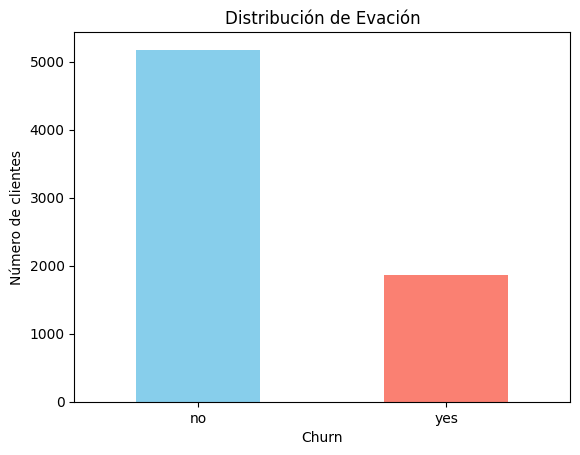

In [ ]:
df_final['churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Evación")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()

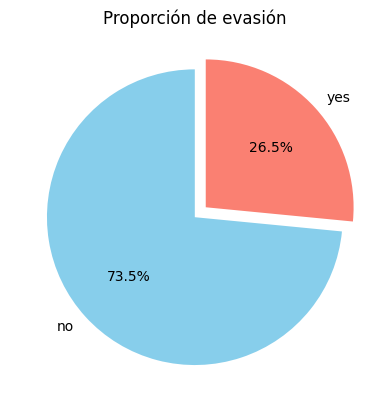

In [ ]:
df_final['churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon'],
    explode=(0,0.1)  # resalta la parte de clientes que se fueron
)
plt.ylabel("")
plt.title("Proporción de evasión")
plt.show()

Recuento de evasión por variables categóricas

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


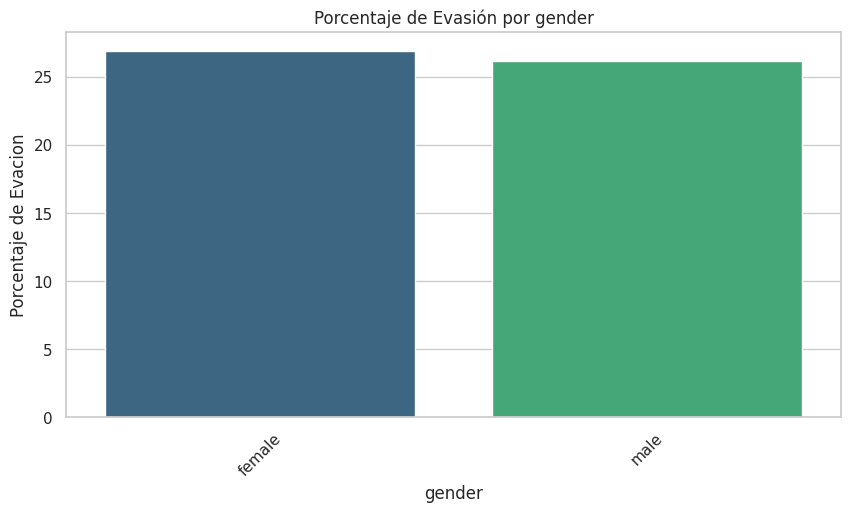

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


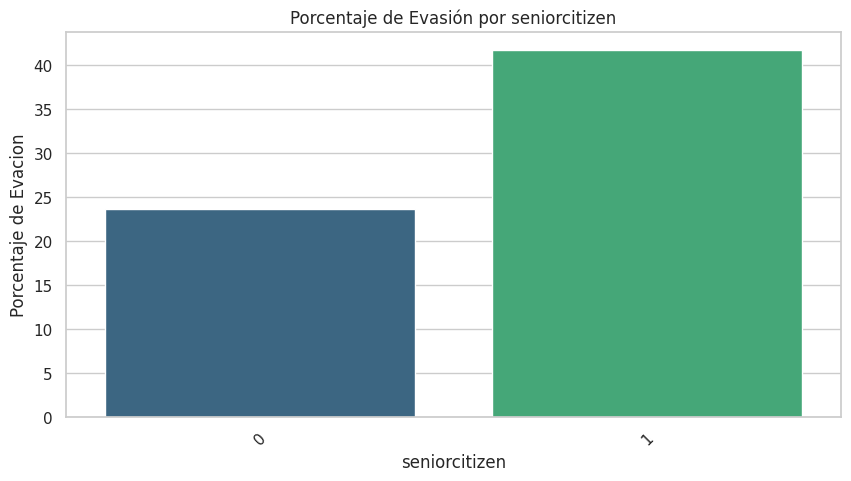

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


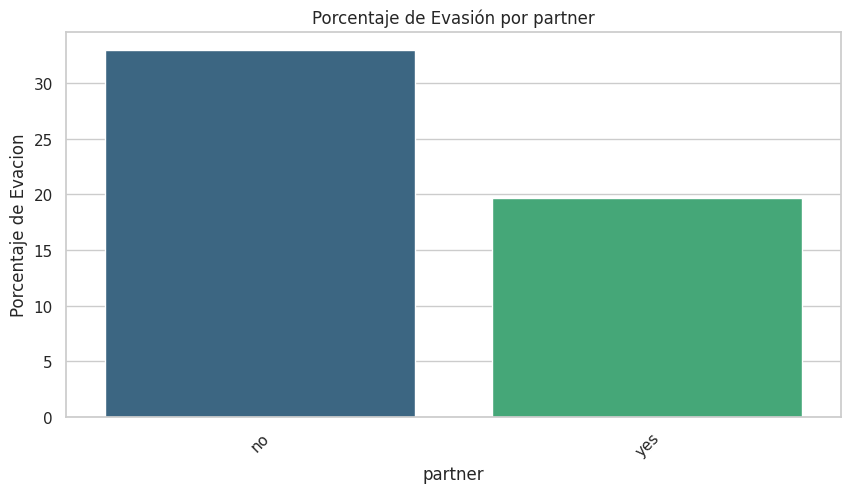

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


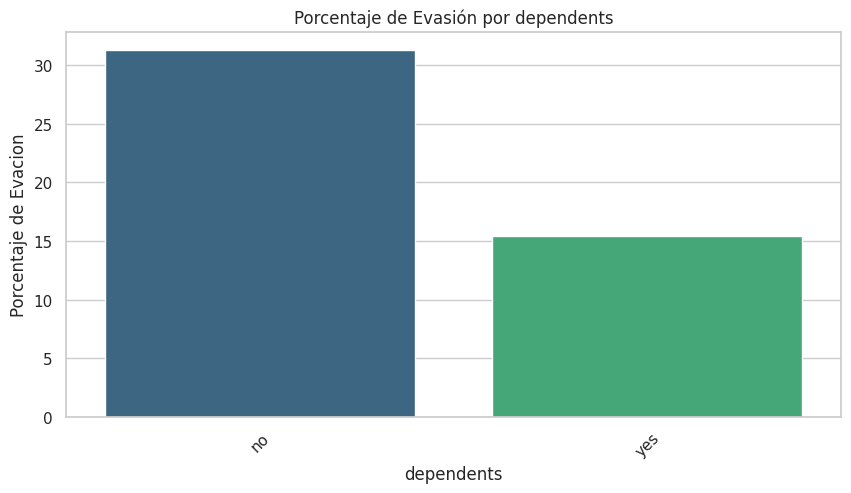

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


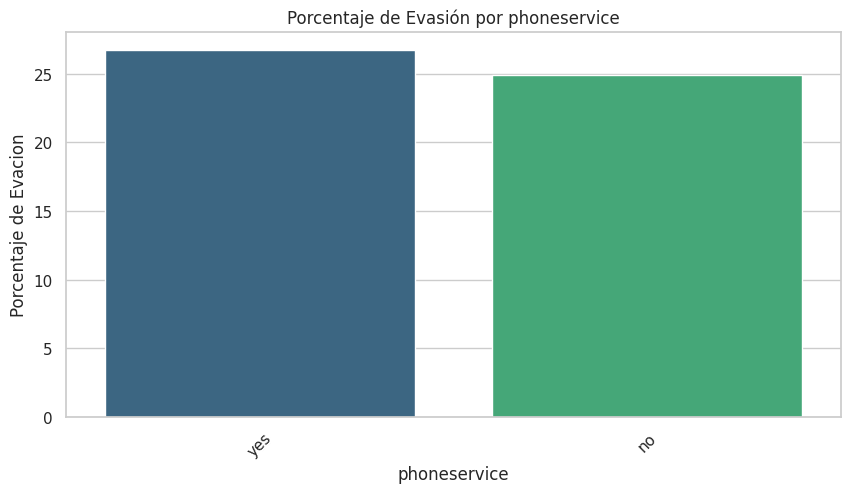

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


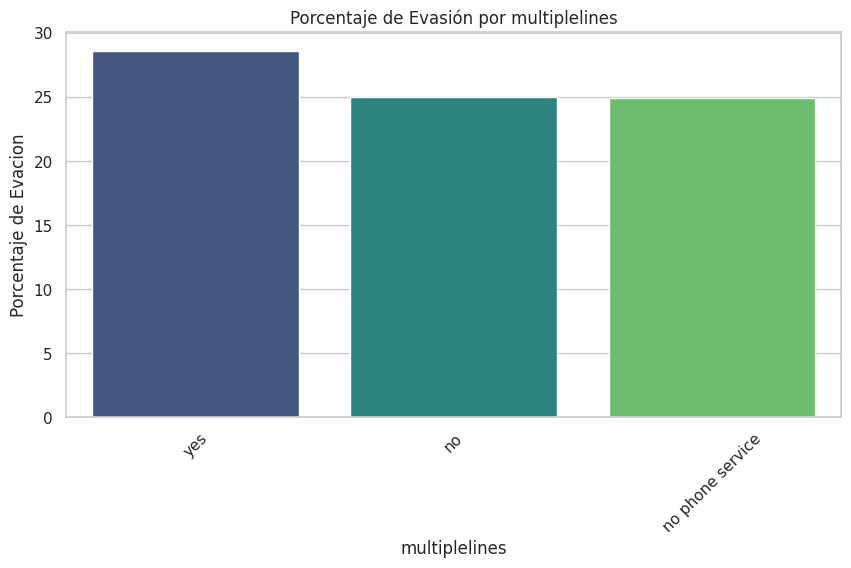

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


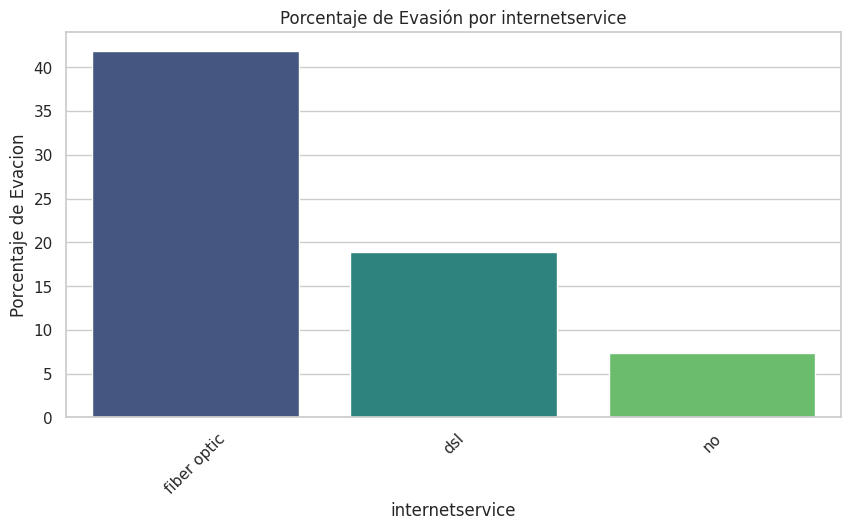

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


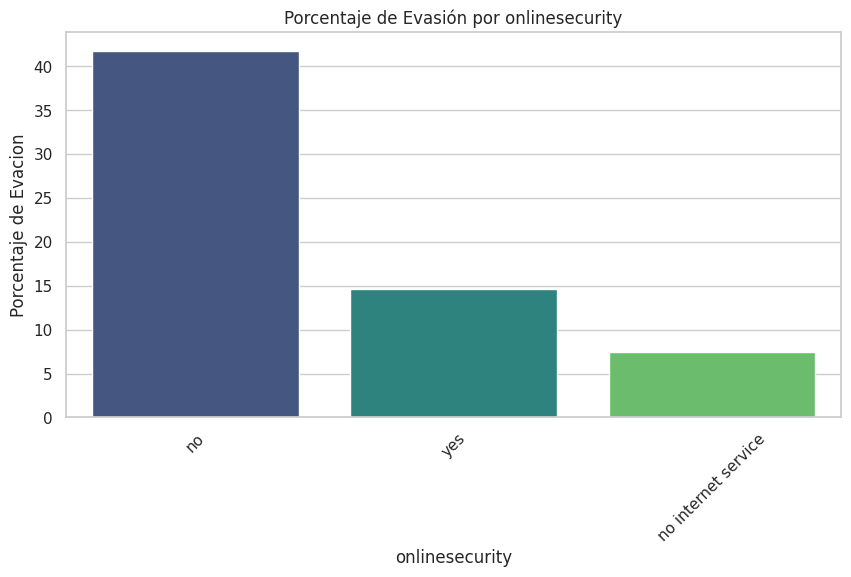

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


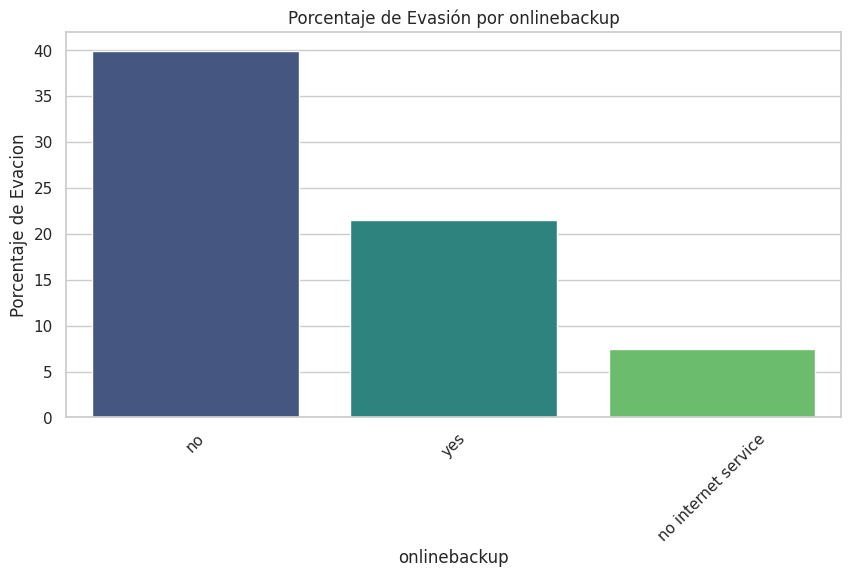

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


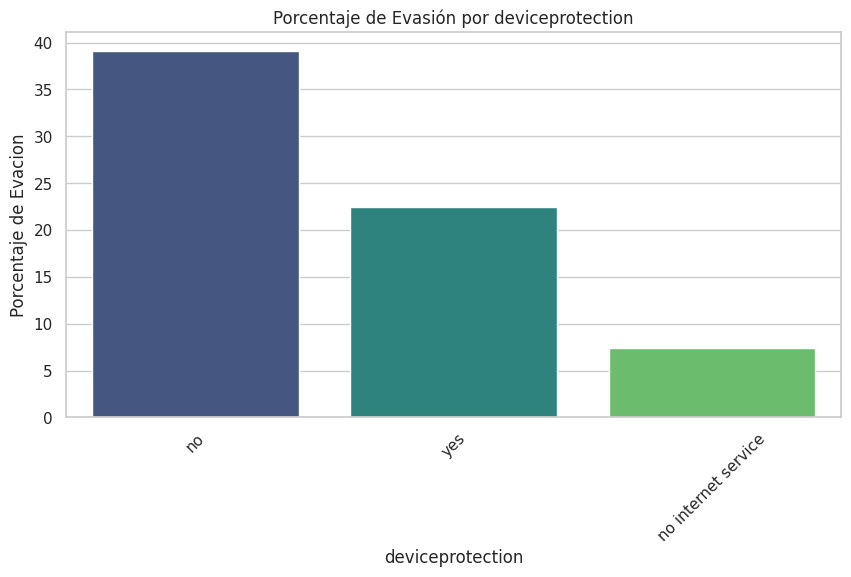

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


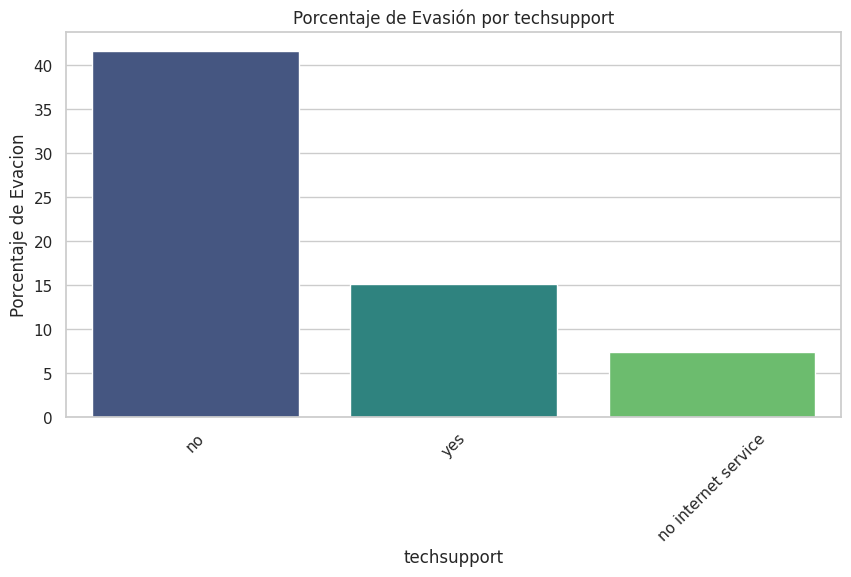

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


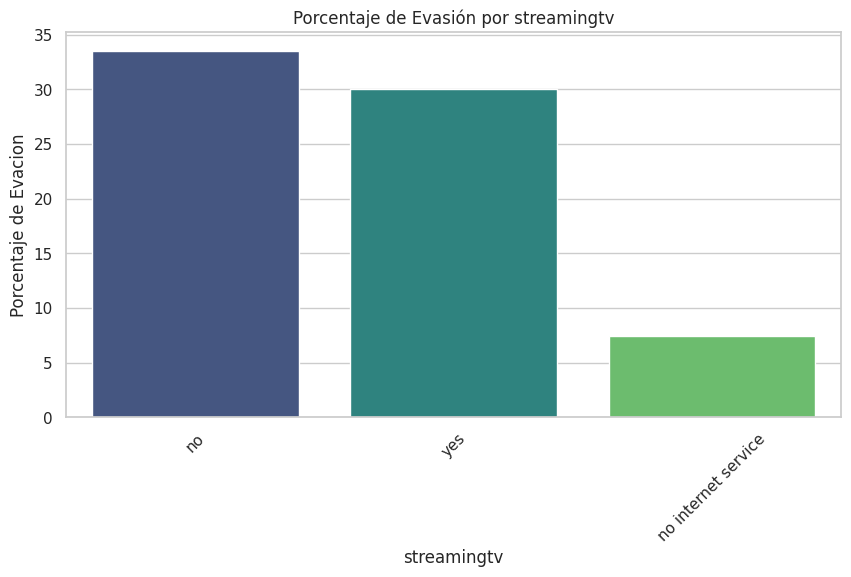

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


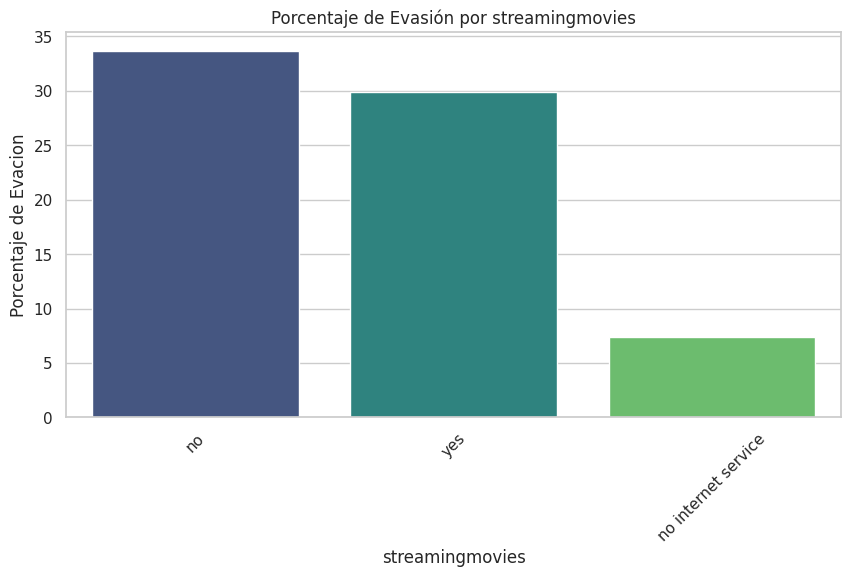

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


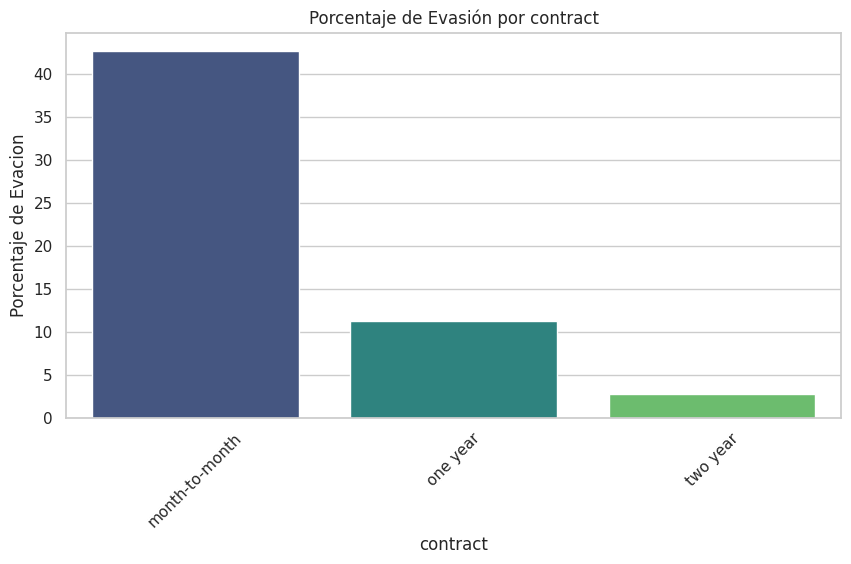

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


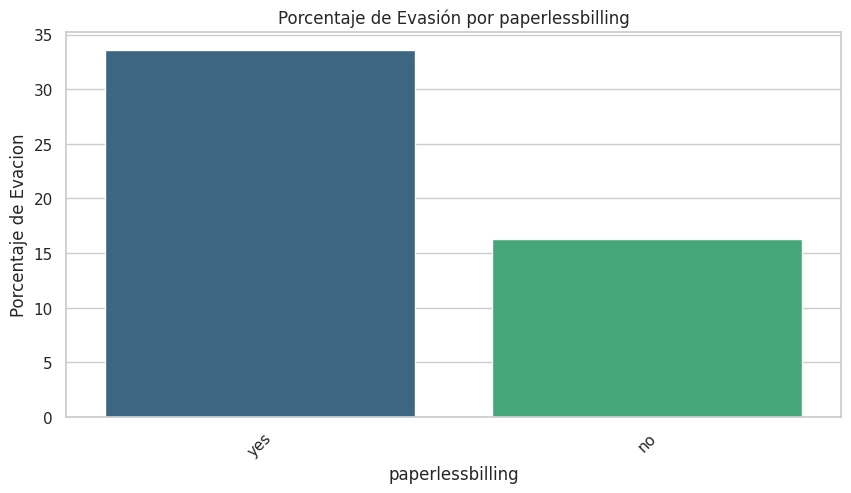

/tmp/ipython-input-3220360314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')


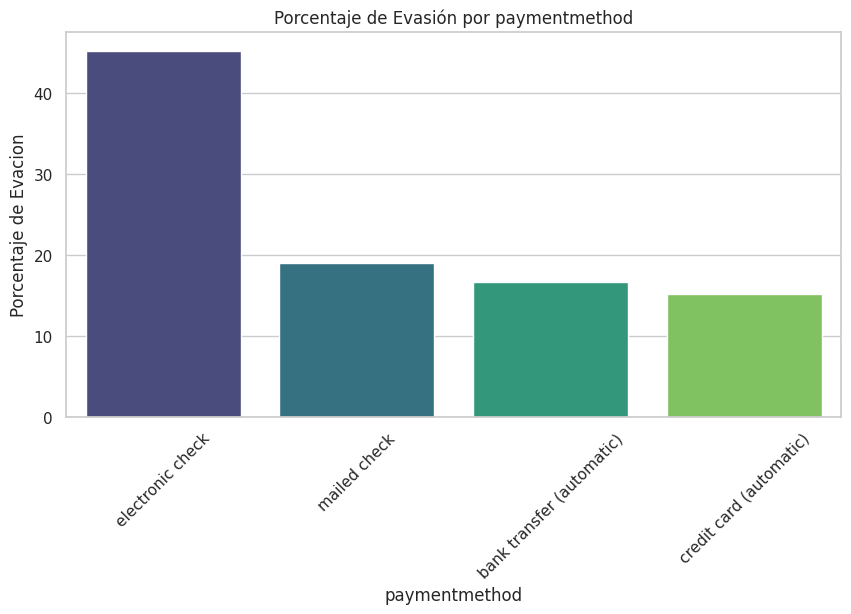

In [118]:
# Lista de variables categóricas relevantes
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents',
                    'phoneservice', 'multiplelines', 'internetservice',
                    'onlinesecurity', 'onlinebackup', 'deviceprotection',
                    'techsupport', 'streamingtv', 'streamingmovies',
                    'contract', 'paperlessbilling', 'paymentmethod']

# Función para graficar distribución de churn por categoría (solo gráfico)
def plot_churn_distribution(var):
    # Calcular porcentajes
    dist = pd.crosstab(df_final[var], df_final['churn'], normalize='index')*100
    dist = dist.sort_values(by='yes', ascending=False)

    # Crear gráfico
    plt.figure(figsize=(10, 5))
    sns.barplot(x=dist.index, y=dist['yes'], palette='viridis')
    plt.title(f'Porcentaje de Evasión por {var}')
    plt.ylabel('Porcentaje de Evacion')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.show()


# Aplicar a todas las variables categóricas
for var in categorical_vars:
    plot_churn_distribution(var)

#📄Informe final

El objetivo de este analisis se llevo a cabo debido a la alta tasa de cancelaciones con enfoque a la evasión de clientes.

Para limpieza y tratamiento de datos primero se cargo la url desde github, la base de datos inicialmente se encontraba en formato JSON, por lo que se procedió a leerla, con esto se pudo notar que dicha base se encontraba anidada, asi que debió de normalizar.
Como continuación se realizo la identificación de valores faltantes, detección de duplicados, conversión de formatos, normalización de texto y la exploración de categorías
Prestando mayor atención a la columna "churn", ya que a partir de esta se realizaría todo el analisis.

El analisis nos muestra que el 26.5% de los clientes han decidido realizar evasión, encontrando mayor incidencia en evasión por

* Multiples linea, para estos usuarios se recomienda revisar la estructura de precios para que de esta manera ofrecer retencion cuando se detecte la intención de cancelar

* Clientes que no tienen dependientes,al no tener responsabilidades familiares, podrían ser más sensibles a ofertas de portabilidad, por lo cual se recomienda crear programas de fidelización.

* Clientes con servicio de internet de fibra optica, en este apartado se tiene que realizar un analisis más exhaustivo, para de esta manerar encontrar el origen de la cancelación, ya que puede deberse a con la calidad/precio, se sugiere añadir valor agregado.

* Clientes que cuentan con contratos por mes,la flexibilidad contractual está facilitando la rotación, se recomienda migración gradual a contratos más largos con incentivos y penalización por cancelación temprana.

* Clientes que requieren factura electronica y método de pago electronico. La digitalización no está reteniendo clientes, se recomienda implementar recordatorios multicanal, algún incetivo por pagos automatizados.

Como recomendación final se sugiere Implementar un sistema de alerta temprana con los patrones detectados, activando protocolos de retención personalizados.

